1. Data Loading
Functionality:
This part loads the MovieLens datasets from local files.

In [18]:
import pandas as pd

# Load datasets
def load_datasets():
    ratings = pd.read_csv('https://raw.githubusercontent.com/rohitandani/Hybrid_Movie_Recommendation_System/main/ml-latest-small/ml-latest-small/ratings.csv')
    movies = pd.read_csv('https://raw.githubusercontent.com/rohitandani/Hybrid_Movie_Recommendation_System/main/ml-latest-small/ml-latest-small/movies.csv')
    return ratings, movies

# Usage
ratings, movies = load_datasets()
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


2.Data Visisulaization

In [6]:
# Inspect datasets
def inspect_datasets(ratings, movies):
    print(ratings.head())
    print(movies.head())

# Usage
inspect_datasets(ratings, movies)



   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


3. Similarity Calculation

In [7]:
# Create user-item matrix
def create_user_item_matrix(ratings):
    user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
    return user_item_matrix

# Usage
user_item_matrix = create_user_item_matrix(ratings)
print(user_item_matrix.head())  # Display the first few rows of the user-item matrix


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

4. Recommendation Function

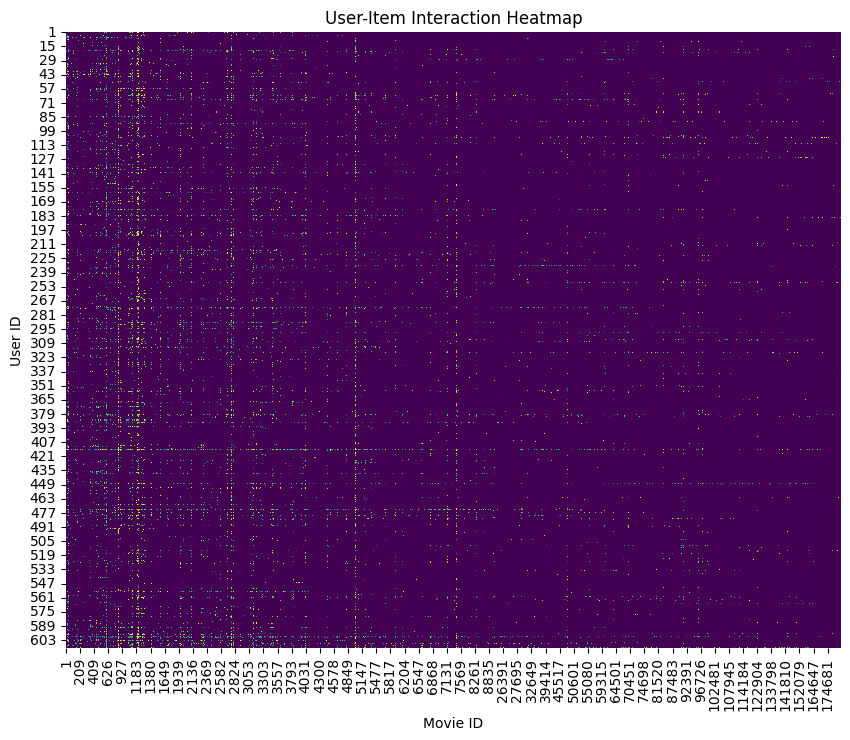

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize User-Item Interaction Heatmap
def visualize_user_item_heatmap(user_item_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(user_item_matrix, cmap='viridis', cbar=False)
    plt.title('User-Item Interaction Heatmap')
    plt.xlabel('Movie ID')
    plt.ylabel('User ID')
    plt.show()

# Usage
visualize_user_item_heatmap(user_item_matrix)


5. Calculating User Similarity
Functionality:
Calculate cosine similarity between users based on their ratings.

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate User Similarity
def calculate_user_similarity(user_item_matrix):
    user_similarity = cosine_similarity(user_item_matrix)
    user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
    return user_similarity_df

# Usage
user_similarity_df = calculate_user_similarity(user_item_matrix)
print(user_similarity_df.head())  # Display the first few rows of the user similarity matrix


userId       1         2         3         4         5         6         7    \
userId                                                                         
1       1.000000  0.027283  0.059720  0.194395  0.129080  0.128152  0.158744   
2       0.027283  1.000000  0.000000  0.003726  0.016614  0.025333  0.027585   
3       0.059720  0.000000  1.000000  0.002251  0.005020  0.003936  0.000000   
4       0.194395  0.003726  0.002251  1.000000  0.128659  0.088491  0.115120   
5       0.129080  0.016614  0.005020  0.128659  1.000000  0.300349  0.108342   

userId       8         9         10   ...       601       602       603  \
userId                                ...                                 
1       0.136968  0.064263  0.016875  ...  0.080554  0.164455  0.221486   
2       0.027257  0.000000  0.067445  ...  0.202671  0.016866  0.011997   
3       0.004941  0.000000  0.000000  ...  0.005048  0.004892  0.024992   
4       0.062969  0.011361  0.031163  ...  0.085938  0.128273  0

6. Visualizing User Similarity Matrix
Functionality:
Visualize the user similarity matrix using a heatmap.

userId       1         2         3         4         5         6         7    \
userId                                                                         
1       1.000000  0.027283  0.059720  0.194395  0.129080  0.128152  0.158744   
2       0.027283  1.000000  0.000000  0.003726  0.016614  0.025333  0.027585   
3       0.059720  0.000000  1.000000  0.002251  0.005020  0.003936  0.000000   
4       0.194395  0.003726  0.002251  1.000000  0.128659  0.088491  0.115120   
5       0.129080  0.016614  0.005020  0.128659  1.000000  0.300349  0.108342   

userId       8         9         10   ...       601       602       603  \
userId                                ...                                 
1       0.136968  0.064263  0.016875  ...  0.080554  0.164455  0.221486   
2       0.027257  0.000000  0.067445  ...  0.202671  0.016866  0.011997   
3       0.004941  0.000000  0.000000  ...  0.005048  0.004892  0.024992   
4       0.062969  0.011361  0.031163  ...  0.085938  0.128273  0

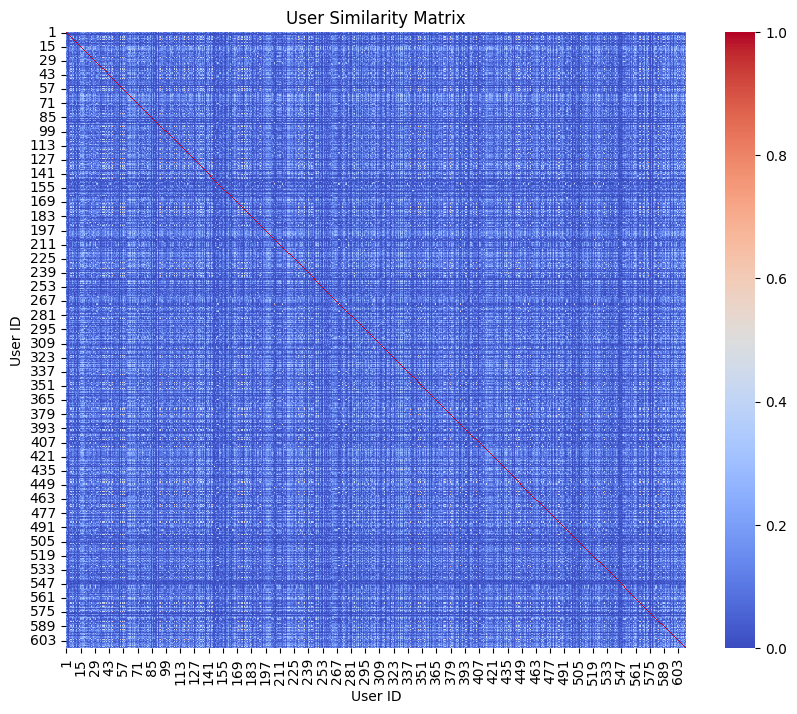

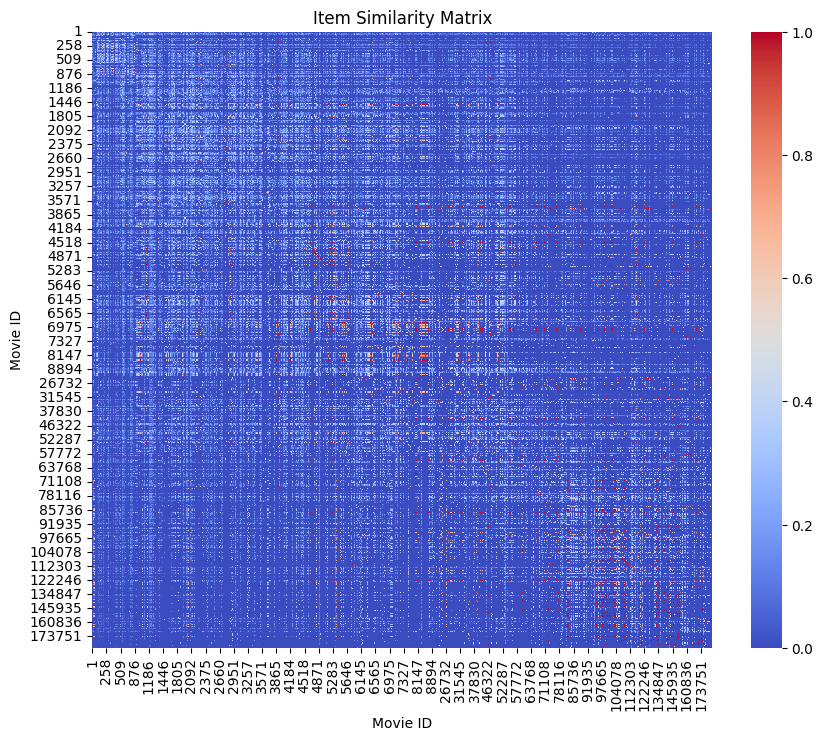

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate User Similarity
def calculate_user_similarity(user_item_matrix):
    user_similarity = cosine_similarity(user_item_matrix)
    user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
    return user_similarity_df

# Calculate Item Similarity
def calculate_item_similarity(user_item_matrix):
    item_similarity = cosine_similarity(user_item_matrix.T)
    item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
    return item_similarity_df

# Usage
user_similarity_df = calculate_user_similarity(user_item_matrix)
item_similarity_df = calculate_item_similarity(user_item_matrix)
print(user_similarity_df.head())
print(item_similarity_df.head())
# Visualize User Similarity Matrix
def visualize_user_similarity_heatmap(user_similarity_df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(user_similarity_df, cmap='coolwarm', annot=False, fmt='.2f')
    plt.title('User Similarity Matrix')
    plt.xlabel('User ID')
    plt.ylabel('User ID')
    plt.show()

# Visualize Item Similarity Matrix
def visualize_item_similarity_heatmap(item_similarity_df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(item_similarity_df, cmap='coolwarm', annot=False, fmt='.2f')
    plt.title('Item Similarity Matrix')
    plt.xlabel('Movie ID')
    plt.ylabel('Movie ID')
    plt.show()

# Usage
visualize_user_similarity_heatmap(user_similarity_df)
visualize_item_similarity_heatmap(item_similarity_df)



7. User-Based Collaborative Filtering
Functionality:
Recommend movies to a user based on ratings from similar users.

In [11]:
# User-Based Collaborative Filtering
def get_user_based_recommendations(user_id, num_recommendations, user_item_matrix, user_similarity_df):
    user_ratings = user_item_matrix.loc[user_id]
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    recommendations = {}
    
    for similar_user, similarity in similar_users.items():
        if similar_user != user_id:
            similar_user_ratings = user_item_matrix.loc[similar_user]
            for movie_id, rating in similar_user_ratings.items():
                if user_ratings[movie_id] == 0:
                    if movie_id not in recommendations:
                        recommendations[movie_id] = rating * similarity
                    else:
                        recommendations[movie_id] += rating * similarity
    return sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:num_recommendations]

# Usage
user_id = 1
recommendations = get_user_based_recommendations(user_id, 5, user_item_matrix, user_similarity_df)
print("User-Based Recommendations:", recommendations)


User-Based Recommendations: [(318, 215.4497028920212), (589, 169.4011820030674), (858, 150.91532685877024), (2762, 135.00986370803545), (4993, 131.86554086066508)]


8. Calculating Item Similarity
Functionality:
Calculate cosine similarity between items based on user ratings.

In [12]:
# Calculate Item Similarity
def calculate_item_similarity(user_item_matrix):
    item_similarity = cosine_similarity(user_item_matrix.T)
    item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
    return item_similarity_df

# Usage
item_similarity_df = calculate_item_similarity(user_item_matrix)
print(item_similarity_df.head())  # Display the first few rows of the item similarity matrix


movieId    1         2         3         4         5         6         7       \
movieId                                                                         
1        1.000000  0.410562  0.296917  0.035573  0.308762  0.376316  0.277491   
2        0.410562  1.000000  0.282438  0.106415  0.287795  0.297009  0.228576   
3        0.296917  0.282438  1.000000  0.092406  0.417802  0.284257  0.402831   
4        0.035573  0.106415  0.092406  1.000000  0.188376  0.089685  0.275035   
5        0.308762  0.287795  0.417802  0.188376  1.000000  0.298969  0.474002   

movieId    8         9         10      ...  193565  193567  193571  193573  \
movieId                                ...                                   
1        0.131629  0.232586  0.395573  ...     0.0     0.0     0.0     0.0   
2        0.172498  0.044835  0.417693  ...     0.0     0.0     0.0     0.0   
3        0.313434  0.304840  0.242954  ...     0.0     0.0     0.0     0.0   
4        0.158022  0.000000  0.095598  ...

9. Item-Based Collaborative Filtering
Functionality:
Recommend movies to a user based on similar movies they have rated highly.

In [13]:
# Item-Based Collaborative Filtering
def get_item_based_recommendations(user_id, num_recommendations, user_item_matrix, item_similarity_df):
    user_ratings = user_item_matrix.loc[user_id]
    recommendations = {}
    
    for movie_id, rating in user_ratings.items():
        if rating > 0:
            similar_items = item_similarity_df[movie_id].sort_values(ascending=False)
            for similar_movie_id, similarity in similar_items.items():
                if user_ratings[similar_movie_id] == 0:
                    if similar_movie_id not in recommendations:
                        recommendations[similar_movie_id] = rating * similarity
                    else:
                        recommendations[similar_movie_id] += rating * similarity
    return sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:num_recommendations]

# Usage
recommendations = get_item_based_recommendations(user_id, 5, user_item_matrix, item_similarity_df)
print("Item-Based Recommendations:", recommendations)


Item-Based Recommendations: [(2918, 352.6840101334495), (1036, 330.9498844896122), (1968, 328.18050722272784), (1527, 326.43737393217197), (1200, 323.1176482769818)]


10. Creating a TF-IDF Matrix for Movie Genres
Functionality:
Create a TF-IDF matrix for movie genres and calculate cosine similarity.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF Matrix for Movie Genres
def create_tfidf_matrix(movies):
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(movies['genres'])
    return tfidf_matrix

# Calculate Cosine Similarity for Movies
def calculate_movie_similarity(tfidf_matrix):
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

# Usage
tfidf_matrix = create_tfidf_matrix(movies)
cosine_sim = calculate_movie_similarity(tfidf_matrix)
print(cosine_sim)  # Display the cosine similarity matrix for movies


[[1.         0.81357774 0.15276924 ... 0.         0.4210373  0.26758648]
 [0.81357774 1.         0.         ... 0.         0.         0.        ]
 [0.15276924 0.         1.         ... 0.         0.         0.57091541]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.4210373  0.         0.         ... 0.         1.         0.        ]
 [0.26758648 0.         0.57091541 ... 0.         0.         1.        ]]


11. Content-Based Filtering
Functionality:
Recommend movies based on their content (genres).

In [15]:
# Content-Based Filtering
def get_content_based_recommendations(movie_id, num_recommendations, movies, cosine_sim):
    movie_index = movies[movies['movieId'] == movie_id].index[0]
    similarity_scores = list(enumerate(cosine_sim[movie_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:num_recommendations+1]
    movie_indices = [i[0] for i in similarity_scores]
    return movies.iloc[movie_indices]

# Usage
movie_id = 1
recommendations = get_content_based_recommendations(movie_id, 5, movies, cosine_sim)
print("Content-Based Recommendations:")
print(recommendations)


Content-Based Recommendations:
      movieId                                           title  \
1706     2294                                     Antz (1998)   
2355     3114                              Toy Story 2 (1999)   
2809     3754  Adventures of Rocky and Bullwinkle, The (2000)   
3000     4016                Emperor's New Groove, The (2000)   
3568     4886                           Monsters, Inc. (2001)   

                                           genres  
1706  Adventure|Animation|Children|Comedy|Fantasy  
2355  Adventure|Animation|Children|Comedy|Fantasy  
2809  Adventure|Animation|Children|Comedy|Fantasy  
3000  Adventure|Animation|Children|Comedy|Fantasy  
3568  Adventure|Animation|Children|Comedy|Fantasy  


12. Visualizing the Distribution of Ratings
Functionality:
Visualize the distribution of ratings using a histogram.

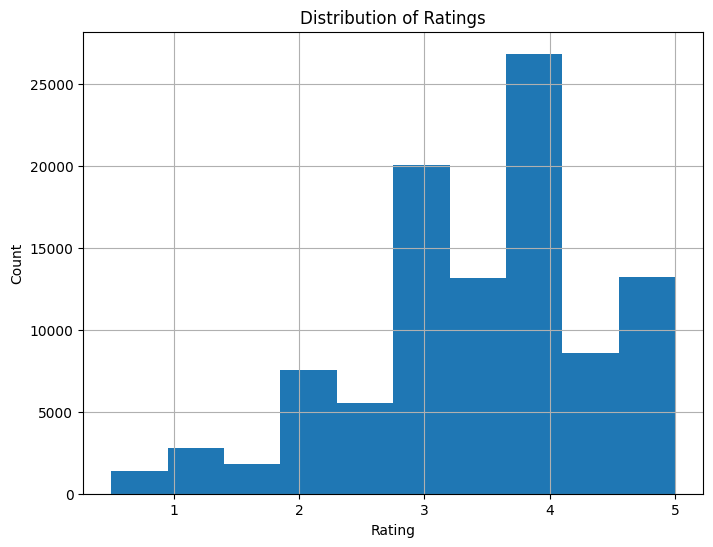

In [16]:
# Visualize Distribution of Ratings
def visualize_ratings_distribution(ratings):
    plt.figure(figsize=(8, 6))
    ratings['rating'].hist(bins=10)
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

# Usage
visualize_ratings_distribution(ratings)


13. Hybrid Recommendation System
Functionality:
Combine user-based, item-based, and content-based recommendations.

In [17]:
# Hybrid Recommendation System
def hybrid_recommendations(user_id, movie_id, num_recommendations, user_item_matrix, user_similarity_df, item_similarity_df, movies, cosine_sim):
    user_based_recs = get_user_based_recommendations(user_id, num_recommendations, user_item_matrix, user_similarity_df)
    item_based_recs = get_item_based_recommendations(user_id, num_recommendations, user_item_matrix, item_similarity_df)
    content_based_recs = get_content_based_recommendations(movie_id, num_recommendations, movies, cosine_sim)
    
    user_based_movie_ids = [rec[0] for rec in user_based_recs]
    item_based_movie_ids = [rec[0] for rec in item_based_recs]
    content_based_movie_ids = content_based_recs['movieId'].tolist()
    
    combined_movie_ids = list(set(user_based_movie_ids + item_based_movie_ids + content_based_movie_ids))
    
    return combined_movie_ids

# Usage
hybrid_recs = hybrid_recs = hybrid_recommendations(user_id, movie_id, 5, user_item_matrix, user_similarity_df, item_similarity_df, movies, cosine_sim)
print("Hybrid Recommendations:", hybrid_recs)

Hybrid Recommendations: [4993, 2918, 2762, 3114, 1036, 589, 3754, 1968, 1200, 4016, 2294, 1527, 4886, 858, 318]
